### 금융상품 갱신 여부 예측하는 DNN
Churn_Modelling.csv 파일을 보면, 고객 정보와 해당 고객이 금융상품을 갱신했는지 안했는지의 여부에 대한 데이터가 있다.

이 데이터를 가지고 갱신여부를 예측하는 딥러닝을 구성하시오.

# Neural Networks and Deep Learning

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os
# from google.colab import drive
# drive.mount('/content/drive')
# os.chdir('/content/drive/MyDrive/data')

In [3]:
df = pd.read_csv('./datas_dnn/Churn_Modelling.csv')

In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [6]:
y = df['Exited']

In [7]:
X = df.loc[ :  , 'CreditScore' : 'EstimatedSalary' ]

In [8]:
y.unique()

array([1, 0])

In [9]:
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


In [10]:
X['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [11]:
X['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [13]:
ct = ColumnTransformer( [ ('onehot', OneHotEncoder(), [1] ) , ('label' , OrdinalEncoder(), [2] ) ] , remainder='passthrough' )

In [14]:
X_ct = ct.fit_transform(X)

In [15]:
X_ct[ 0 , : ]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       6.1900000e+02, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05])

In [16]:
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


In [17]:
X_ct

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]], shape=(10000, 12))

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [19]:
X_ct

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]], shape=(10000, 12))

In [20]:
sc = MinMaxScaler()

In [21]:
X_scaled = sc.fit_transform(X_ct)

In [22]:
X_scaled.shape

(10000, 12)

In [23]:
X_scaled[0, :]

array([1.        , 0.        , 0.        , 0.        , 0.538     ,
       0.32432432, 0.2       , 0.        , 0.        , 1.        ,
       1.        , 0.50673489])

In [24]:
X.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_scaled.shape

(10000, 12)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [28]:
# modeling

In [29]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [30]:
X_train.shape

(8000, 12)

In [31]:
model = Sequential()

In [32]:
model.add(  keras.Input( shape=(12, ) )   )

In [33]:
model.add(  Dense(units= 6, activation='relu' )   )

In [34]:
model.add( Dense(units= 8, activation='relu'))

In [35]:
model.add( Dense(units= 1, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)               ┃ Output Shape        ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense (Dense)              │ (None, 6)           │          78 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_1 (Dense)            │ (None, 8)           │          56 │
├────────────────────────────┼─────────────────────┼─────────────┤
│ dense_2 (Dense)            │ (None, 1)           │           9 │
└────────────────────────────┴─────────────────────┴─────────────┘

 Total params: 143 (572.00 B)

 Trainable params: 143 (572.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
# compile

In [38]:
model.compile( optimizer='adam', loss= 'binary_crossentropy', metrics= ['accuracy']  )

In [39]:
model.fit(X_train, y_train, epochs= 50, batch_size= 10 )

Epoch 1/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.7945 - loss: 0.4925
Epoch 2/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 749us/step - accuracy: 0.7945 - loss: 0.4764
Epoch 3/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.7945 - loss: 0.4672
Epoch 4/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step - accuracy: 0.7945 - loss: 0.4565
Epoch 5/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.7955 - loss: 0.4459
Epoch 6/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 705us/step - accuracy: 0.8039 - loss: 0.4366
Epoch 7/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.8141 - loss: 0.4300
Epoch 8/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.8175 - loss: 0.4273
Epoch 9/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 745us/step - accuracy: 0.8214 - loss: 0.4222
Epoch 10/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8260 - loss: 0.4172
Epoch 11/50
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.8280 - loss: 0.4117
Epoch 12/50
800/800 ━━━━━━━━━━

In [68]:
X_train.shape

(8000, 12)

In [69]:
8000 / 250

32.0

In [70]:
model.evaluate(X_test, y_test )

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.8590 - loss: 0.3498


[0.3497735261917114, 0.859000027179718]

In [71]:
# 정확도 84% 모델완성.

# 모델 평가

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
print(y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
[[0.0374678 ]
 [0.01388786]
 [0.13275486]
 ...
 [0.55527365]
 [0.0679113 ]
 [0.14952736]]


In [73]:
# 예측 레이블 출력

In [74]:
y_pred_labels = y_pred.argmax(axis=1)   # softmax 출력일 때
y_pred_labels

array([0, 0, 0, ..., 0, 0, 0], shape=(2000,))

## confusion matrix

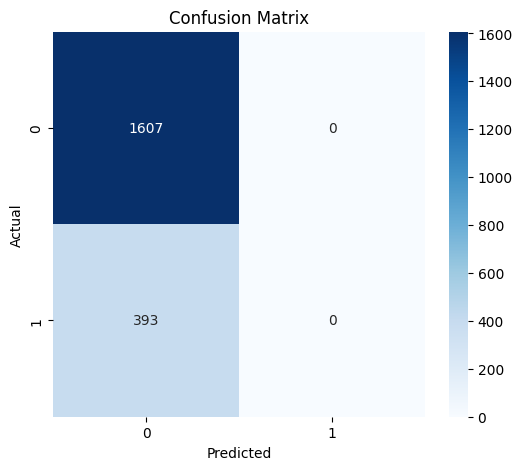

In [75]:
cm = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## 모델 평가
- 정확도, 적중률, 정밀도, f1-score

In [76]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_labels = y_pred.argmax(axis=1)   # 딥러닝 softmax 출력일 때

print(classification_report(y_test, y_pred_labels))


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



C:\Users\Admin\miniconda3\envs\tf_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\miniconda3\envs\tf_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Admin\miniconda3\envs\tf_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step



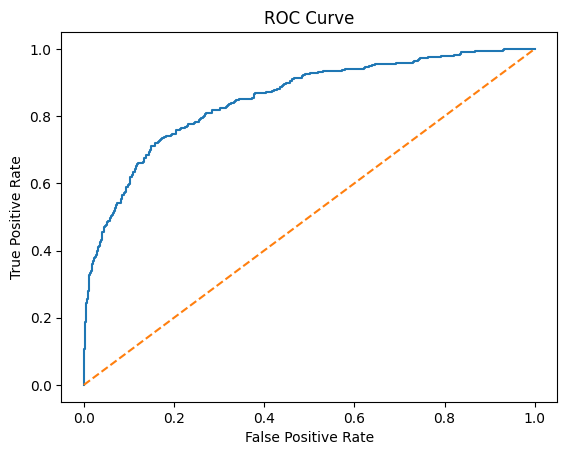

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score

# 이진 분류 가정
y_pred_proba = model.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
print()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], '--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


In [78]:
print(roc_auc_score(y_test, y_pred_labels))

0.5


## 다음 신규 데이터를 통해 분류해 보자

- Geography: France
- Credit Score: 600
- Gender: Male
- Age: 40
- Tenure: 3
- Balance: 60000
- Number of Products: 2
- Has Credit Card: Yes
- Is Active Member: Yes
- Estimated Salary: 50000

In [79]:
X.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58


In [80]:
new_data = [ {'CreditScore' : 600, 'Geography' : 'France' , 'Gender' : 'Male', 'Age': 40, 'Tenure' : 3, 'Balance' : 60000, 'NumOfProducts':2, 'HasCrCard' : 1, 'IsActiveMember' : 1,'EstimatedSalary' : 50000 } ]

In [81]:
df_new = pd.DataFrame(new_data)

In [82]:
df_new

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,600,France,Male,40,3,60000,2,1,1,50000


In [83]:
new_data_ct = ct.transform(df_new)

In [84]:
new_data_ct

array([[1.e+00, 0.e+00, 0.e+00, 1.e+00, 6.e+02, 4.e+01, 3.e+00, 6.e+04,
        2.e+00, 1.e+00, 1.e+00, 5.e+04]])

In [85]:
new_data_sc = sc.transform(new_data_ct)

In [86]:
new_data_sc

array([[1.        , 0.        , 0.        , 1.        , 0.5       ,
        0.2972973 , 0.3       , 0.23914092, 0.33333333, 1.        ,
        1.        , 0.24996597]])

In [87]:
y_pred = model.predict( new_data_sc )

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [88]:
(y_pred > 0.5).astype(int)

array([[0]])

In [89]:
import joblib

In [90]:
joblib.dump(ct, 'ct.pkl')

['ct.pkl']

In [91]:
joblib.dump(sc, 'sc.pkl')

['sc.pkl']

In [92]:
keras.models.save_model(model, 'model.h5')

In [93]:
model.save("model.keras")

In [94]:
model2 = keras.models.load_model("model.h5")

In [95]:
keras.models.load_model("model.keras")

C:\Users\Admin\miniconda3\envs\tf_env\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

### 용어 정리

epoch

- 한 번의 epoch는 신경망에서 전체 데이터 셋에 대해 forward pass/backward pass 과정을 거친 것을 말함. 즉, 전체 데이터 셋에 대해 한 번 학습을 완료한 상태


batch_size

메모리의 한계와 속도 저하 때문에 대부분의 경우에는 한 번의 epoch에서 모든 데이터를 한꺼번에 집어넣을 수는 없습니다. 그래서 데이터를 나누어서 주게 되는데 이때 몇 번 나누어서 주는가를 iteration, 각 iteration마다 주는 데이터 사이즈를 batch size라고 합니다.

출처: https://www.slideshare.net/w0ong/ss-82372826